In [1]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [11]:
df = pd.read_json('gme.json')
df2 = pd.read_json('tsla.json')

In [13]:

print(df.dtypes)

Date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object


# Variables
#### Date:
The date the stock was observed

stored as date


#### Open:
Open value of stock

stored as float


#### High:
Highest value of the stock that day

stored as float


#### Low:
Lowest value of the stock that day

stored as float


#### Close:
Value of stock at close

stored as float


#### Adj Close:
Close price after corporate actions

stored as float


#### Volume:
Number of stock traded

stored as int


In [4]:
df[df['High'] == df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [5]:
df.groupby(df['Date'].dt.to_period('M'))['High'].mean().idxmax()

Period('2021-06', 'M')

<Axes: xlabel='Low', ylabel='Volume'>

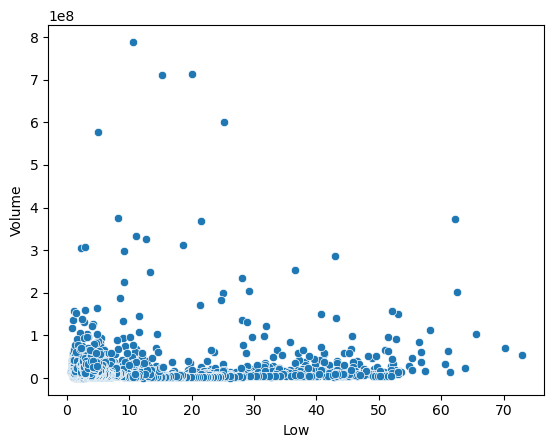

In [6]:
sns.scatterplot(data=df, x='Low', y='Volume')

<Axes: xlabel='Date', ylabel='High'>

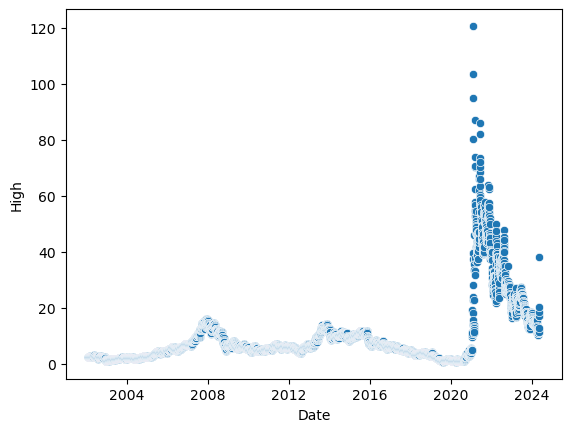

In [7]:
sns.scatterplot(data=df, x='Date', y='High')

In [8]:
monthly_summary = df.resample('Y', on='Date').agg({
    'Open': 'first',
    'Close': 'last',
    'High': 'max',
    'Low': 'min',
    'Volume': 'sum'
}).reset_index()

print(monthly_summary)

         Date       Open      Close        High       Low       Volume
0  2002-12-31   2.406250   1.225000    3.037500   1.11500    670193600
1  2003-12-31   1.225000   1.926250    2.381250   0.93750    757133600
2  2004-12-31   1.975000   2.795000    2.938750   1.79625    657867200
3  2005-12-31   2.868750   3.977500    4.801250   2.31625   1891889600
4  2006-12-31   3.977500   6.888750    7.302500   3.89375   2589343200
5  2007-12-31   6.888750  15.527500   15.942500   6.23750   2460329600
6  2008-12-31  15.537500   5.415000   15.572500   4.22750   3433750000
7  2009-12-31   5.432500   5.485000    8.205000   5.00500   4812090800
8  2010-12-31   5.517500   5.720000    6.437500   4.28000   4802096000
9  2011-12-31   5.767500   6.032500    7.165000   4.58500   4068366000
10 2012-12-31   6.107500   6.272500    7.087500   3.83000   3408874400
11 2013-12-31   6.395000  12.315000   14.435000   5.57500   3080650800
12 2014-12-31  12.287500   8.450000   12.500000   7.95250   3379216000
13 201

C:\Users\whenp\AppData\Local\Temp\ipykernel_27560\1137764345.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  monthly_summary = df.resample('Y', on='Date').agg({


In [9]:
df['Date'].max()

Timestamp('2024-05-13 00:00:00')

In [10]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=5min&apikey=XREXHM5L10YQJJSK'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'GME', '3. Last Refreshed': '2024-10-18 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-10-18 19:55:00': {'1. open': '21.2100', '2. high': '21.2100', '3. low': '21.1604', '4. close': '21.2000', '5. volume': '557'}, '2024-10-18 19:50:00': {'1. open': '21.2000', '2. high': '21.2100', '3. low': '21.1600', '4. close': '21.2000', '5. volume': '867'}, '2024-10-18 19:45:00': {'1. open': '21.2000', '2. high': '21.2100', '3. low': '21.2000', '4. close': '21.2000', '5. volume': '139'}, '2024-10-18 19:40:00': {'1. open': '21.1900', '2. high': '21.2100', '3. low': '21.1600', '4. close': '21.1626', '5. volume': '4384'}, '2024-10-18 19:35:00': {'1. open': '21.1700', '2. high': '21.2066', '3. low': '21.1500', '4. close': '21.2000', '5. volume': '695'}, '2024-10-18 19:30:00': {'1. open': '21.2097', '2. high': '21.2100', '3.

<Axes: xlabel='Date', ylabel='high'>

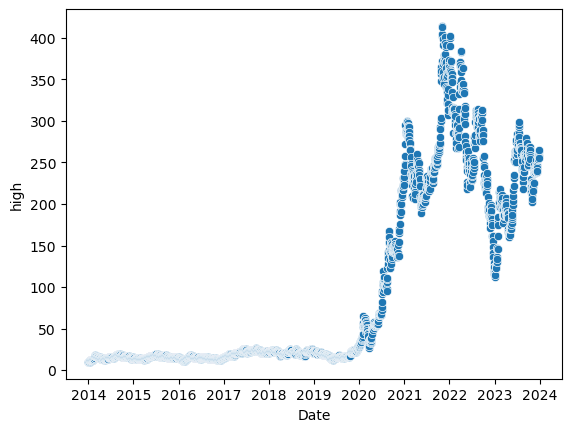

In [32]:
sns.scatterplot(data=df2, x='Date', y='high')


1975

In [38]:
df2.loc[df2["high"].idxmax(), "Date"]

Timestamp('2021-11-04 00:00:00')